In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
bna_2022 = pd.read_csv('../data/bna_2022.csv')

In [3]:
bna_2022.shape

(7780, 45)

In [4]:
bna_2022.head()

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,KBNA,observation,1641027180,KBNA,Nashville,1641019980,N,71,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KBNA,observation,1641030780,KBNA,Nashville,1641023580,N,72,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KBNA,observation,1641034380,KBNA,Nashville,1641027180,N,73,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KBNA,observation,1641037980,KBNA,Nashville,1641030780,N,73,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KBNA,observation,1641041580,KBNA,Nashville,1641034380,N,73,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
headway = pd.read_csv('../data/Headway Data.csv')

In [6]:
headway.shape

(1981715, 30)

In [7]:
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [8]:
bna_weather = pd.read_csv('../data/bna_weather.csv')

In [9]:
bna_weather.shape

(9739, 46)

In [10]:
bna_weather.head()

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01 00:53:00,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01 01:30:00,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01 01:53:00,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01 02:53:00,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01 03:53:00,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First we will look to see how many 'n/a' are in each data frame by coloumns and make a decision as to which columns to possible remove from the dataframes. 

Starting with the Headway dataframe. 

In [11]:
headway.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              41
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           54383
ACTUAL_DEPARTURE_TIME         54430
ADHERENCE                     54430
SCHEDULED_HDWY               432294
ACTUAL_HDWY                  473824
HDWY_DEV                     474368
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED    402647
IS_RELIEF                   

creating a new df to for headway with the agreed upon columns. 

In [12]:
headway_df = headway[['DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE','SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV']]

In [13]:
headway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   DATE                   object 
 1   ROUTE_ABBR             int64  
 2   BLOCK_ABBR             int64  
 3   OPERATOR               int64  
 4   TRIP_ID                int64  
 5   ROUTE_DIRECTION_NAME   object 
 6   TIME_POINT_ABBR        object 
 7   ROUTE_STOP_SEQUENCE    float64
 8   SCHEDULED_TIME         object 
 9   ACTUAL_ARRIVAL_TIME    object 
 10  ACTUAL_DEPARTURE_TIME  object 
 11  ADHERENCE              float64
 12  SCHEDULED_HDWY         float64
 13  ACTUAL_HDWY            float64
 14  HDWY_DEV               float64
dtypes: float64(5), int64(4), object(6)
memory usage: 226.8+ MB


In [14]:
headway_df.isna().sum()

DATE                          0
ROUTE_ABBR                    0
BLOCK_ABBR                    0
OPERATOR                      0
TRIP_ID                       0
ROUTE_DIRECTION_NAME          0
TIME_POINT_ABBR               0
ROUTE_STOP_SEQUENCE          41
SCHEDULED_TIME                0
ACTUAL_ARRIVAL_TIME       54383
ACTUAL_DEPARTURE_TIME     54430
ADHERENCE                 54430
SCHEDULED_HDWY           432294
ACTUAL_HDWY              473824
HDWY_DEV                 474368
dtype: int64

now it's time to remove the nulls before renaming the columns.

In [15]:
headway_df2 = headway_df.dropna(how='any', axis=0)

In [16]:
headway_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507318 entries, 0 to 1981711
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DATE                   1507318 non-null  object 
 1   ROUTE_ABBR             1507318 non-null  int64  
 2   BLOCK_ABBR             1507318 non-null  int64  
 3   OPERATOR               1507318 non-null  int64  
 4   TRIP_ID                1507318 non-null  int64  
 5   ROUTE_DIRECTION_NAME   1507318 non-null  object 
 6   TIME_POINT_ABBR        1507318 non-null  object 
 7   ROUTE_STOP_SEQUENCE    1507318 non-null  float64
 8   SCHEDULED_TIME         1507318 non-null  object 
 9   ACTUAL_ARRIVAL_TIME    1507318 non-null  object 
 10  ACTUAL_DEPARTURE_TIME  1507318 non-null  object 
 11  ADHERENCE              1507318 non-null  float64
 12  SCHEDULED_HDWY         1507318 non-null  float64
 13  ACTUAL_HDWY            1507318 non-null  float64
 14  HDWY_DEV          

1981715 - 1507318 = 474,397 (rows removed)

In [17]:
headway_df2.shape

(1507318, 15)

changing the columns names

headway_df2.columns = ['adh_id', 'date', 'rte_abbr', 'blk_abbr', 'opr', 'trip_id', 'rte_dir_name', 'time_pt_abbr', 'rte_stop_seq', 'lat', 'log', 'schd_time', 'act_arrvl_time', 'act_depart', 'adh', 'schd_hdwy', 'act_hdwy', 'hdwy_dev']

In [34]:
headway_df2.columns = ['date', 'rte_abbr', 'blk_abbr', 'operator', 'trip_id', 'rte_dir_name', 'time_pt_abbr', 'rte_stop_seq', 'schd_time', 'act_arrvl_time', 'act_depart', 'adh', 'schd_hdwy', 'act_hdwy', 'hdwy_dev']

In [35]:
headway_df2.head()

,date,rte_abbr,blk_abbr,operator,trip_id,rte_dir_name,time_pt_abbr,rte_stop_seq,schd_time,act_arrvl_time,act_depart,adh,schd_hdwy,act_hdwy,hdwy_dev
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,21BK,3.0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
12,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,MHSP,15.0,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667
13,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,ELIZ,11.0,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666
14,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,CV23,6.0,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667


In [36]:
headway_df2['date']

0          2021-11-01
1          2021-11-01
12         2021-11-01
13         2021-11-01
14         2021-11-01
              ...    
1981695    2022-11-01
1981696    2022-11-01
1981698    2022-11-01
1981699    2022-11-01
1981711    2022-11-01
Name: date, Length: 1507318, dtype: object

now to work on the bna weather cvs file. 

In [37]:
bna_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9739 non-null   object 
 1   key                        9739 non-null   object 
 2   class                      9739 non-null   object 
 3   expire_time_gmt            9739 non-null   int64  
 4   obs_id                     9739 non-null   object 
 5   obs_name                   9739 non-null   object 
 6   valid_time_gmt             9739 non-null   int64  
 7   day_ind                    9739 non-null   object 
 8   temp                       9739 non-null   int64  
 9   wx_icon                    9739 non-null   int64  
 10  icon_extd                  9739 non-null   int64  
 11  wx_phrase                  9739 non-null   object 
 12  pressure_tend              2885 non-null   float64
 13  pressure_desc              2885 non-null   objec

In [38]:
bna_weather2 = bna_weather[['Date', 'temp', 'wx_phrase']]

In [39]:
bna_weather2.head()

,Date,temp,wx_phrase
0,2021-11-01 00:53:00,51,Cloudy
1,2021-11-01 01:30:00,50,Partly Cloudy
2,2021-11-01 01:53:00,49,Fair
3,2021-11-01 02:53:00,48,Fair
4,2021-11-01 03:53:00,47,Fair


In [40]:
bna_weather2.columns = ['date', 'temp','wx_condition']

In [41]:
bna_weather2.head()

,date,temp,wx_condition
0,2021-11-01 00:53:00,51,Cloudy
1,2021-11-01 01:30:00,50,Partly Cloudy
2,2021-11-01 01:53:00,49,Fair
3,2021-11-01 02:53:00,48,Fair
4,2021-11-01 03:53:00,47,Fair


In [42]:
bna_weather2.isna().sum()

date            0
temp            0
wx_condition    0
dtype: int64

In [43]:
bna_weather2['date'].str[:10]

0       2021-11-01
1       2021-11-01
2       2021-11-01
3       2021-11-01
4       2021-11-01
           ...    
9734    2022-10-31
9735    2022-10-31
9736    2022-10-31
9737    2022-10-31
9738    2022-10-31
Name: date, Length: 9739, dtype: object

In [44]:
bna_weather2['date'] = bna_weather2['date'].str[:10]

C:\Users\aaust\AppData\Local\Temp\ipykernel_2796\2151395105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bna_weather2['date'] = bna_weather2['date'].str[:10]


In [45]:
bna_weather2.head()

,date,temp,wx_condition
0,2021-11-01,51,Cloudy
1,2021-11-01,50,Partly Cloudy
2,2021-11-01,49,Fair
3,2021-11-01,48,Fair
4,2021-11-01,47,Fair


now to merge the weather_bna dataframe to the headway dataframe.

In [46]:
wego_trips = headway_df2.merge(bna_weather2, on=['date'], how='outer')

In [47]:
wego_trips.head(8)

,date,rte_abbr,blk_abbr,operator,trip_id,rte_dir_name,time_pt_abbr,rte_stop_seq,schd_time,act_arrvl_time,act_depart,adh,schd_hdwy,act_hdwy,hdwy_dev,temp,wx_condition
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,51.0,Cloudy
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,50.0,Partly Cloudy
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,49.0,Fair
3,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,48.0,Fair
4,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,47.0,Fair
5,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,45.0,Fair
6,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,46.0,Fair
7,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,45.0,Fair


In [48]:
wego_trips.isna().sum()

date                 0
rte_abbr             0
blk_abbr             0
operator             0
trip_id              0
rte_dir_name         0
time_pt_abbr         0
rte_stop_seq         0
schd_time            0
act_arrvl_time       0
act_depart           0
adh                  0
schd_hdwy            0
act_hdwy             0
hdwy_dev             0
temp              4998
wx_condition      4998
dtype: int64

In [ ]:
samp1 = wego_trips 

time to start plotting now

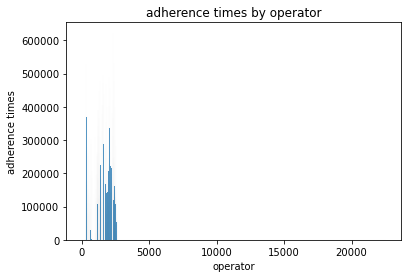

In [52]:
sns.histplot(data=wego_trips, x='operator')
plt.title("adherence times by operator")
plt.xlabel('operator')
plt.ylabel('adherence times');

<AxesSubplot:xlabel='operator', ylabel='act_hdwy'>

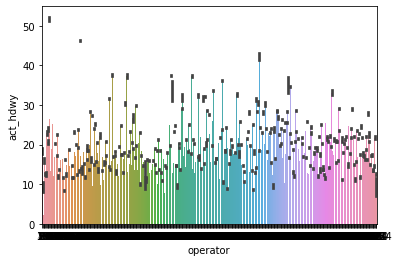

In [56]:
sns.barplot(data=wego_trips, x='operator', y='act_hdwy')